# 의사결정나무
- 데이터 분류 및 회귀에 사용되는 지도학습 알고리즘 
- 가장 큰 장점, 데이터를 표준화할 필요가 없다.

### 문제 정의
서울 지역 (구)의 경도와 위도 정보를 사용하여  
임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류해보는 예제  

In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv("../Data/seoul_district.csv")
train_df.head()

,district,longitude,latitude,label
0,강서구,126.849500,37.551000,강서
1,양천구,126.855396,37.524240,강서
2,구로구,126.887400,37.495400,강서
3,금천구,126.902000,37.451900,강서
4,마포구,126.908728,37.560229,강서


In [5]:
test_df = pd.read_csv("../Data/seoul_dong.csv")
test_df.head()

,dong,longitude,latitude,label
0,개봉동,126.854547,37.489853,강서
1,고척동,126.859245,37.501394,강서
2,화곡동,126.847951,37.537759,강서
3,방화동,126.815719,37.575817,강서
4,상암동,126.891620,37.577039,강서


In [6]:
# 레이블의 갯수 확인
train_df.label.value_counts()

강서    5
강남    5
강북    5
강동    5
Name: label, dtype: int64

In [7]:
test_df.label.value_counts()

강서    5
강남    5
강북    5
강동    5
Name: label, dtype: int64

# 데이터 전처리

In [11]:
# 경도와 위도의 평균과 편차
train_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


> 경도와 위도는 동일한 단위를 사용  
> 의사결정나무는 각 특징을 독립적으로 사용하기 때문에 별다른 전처리 과정이 필요 없음

# 데이터 시각화

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [15]:
train_df.head(1)

,district,longitude,latitude,label
0,강서구,126.8495,37.551,강서


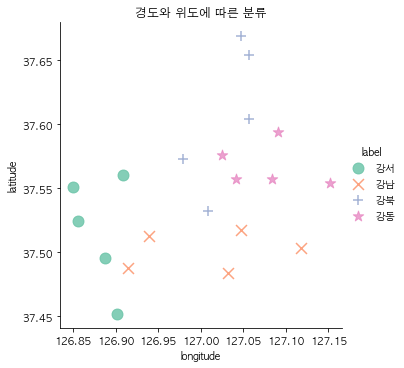

In [38]:
# train_df의 위도 경도에 해당하는 label을 시각화 하려고 한다.

sns.lmplot(
    data=train_df,
    x='longitude',
    y='latitude',
    hue='label',
    markers=['o','x','+','*'],
    scatter_kws={'s':120},
    palette = 'Set2',
    fit_reg=False
)

plt.title('경도와 위도에 따른 분류')
plt.show()


### 데이터 다듬기
- train_df에서 district 제거
- test_df dong 제거
- X_train = 위도와 경도
- y_train = 위도와 경도
- x_test = 위도와 경도
- y_test = 라벨

In [40]:
train_df.drop('district',axis=1,inplace=True)


In [42]:
test_df.drop('dong',axis=1,inplace=True)


In [44]:
X_train = train_df[['longitude','latitude']]
y_train = train_df[['label']]
X_test = test_df[['longitude','latitude']]
y_test = test_df[['label']]

In [46]:
test_df.head()

,longitude,latitude,label
0,126.854547,37.489853,강서
1,126.859245,37.501394,강서
2,126.847951,37.537759,강서
3,126.815719,37.575817,강서
4,126.891620,37.577039,강서


In [50]:
# 의사결정 나무로 학습시키기 (random_state = 35)


from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt_clf = DecisionTreeClassifier(random_state=35).fit(X_train,y_train)

pred = dt_clf.predict(X_test)
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

          강남       1.00      1.00      1.00         5
          강동       0.83      1.00      0.91         5
          강북       1.00      0.80      0.89         5
          강서       1.00      1.00      1.00         5

    accuracy                           0.95        20
   macro avg       0.96      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



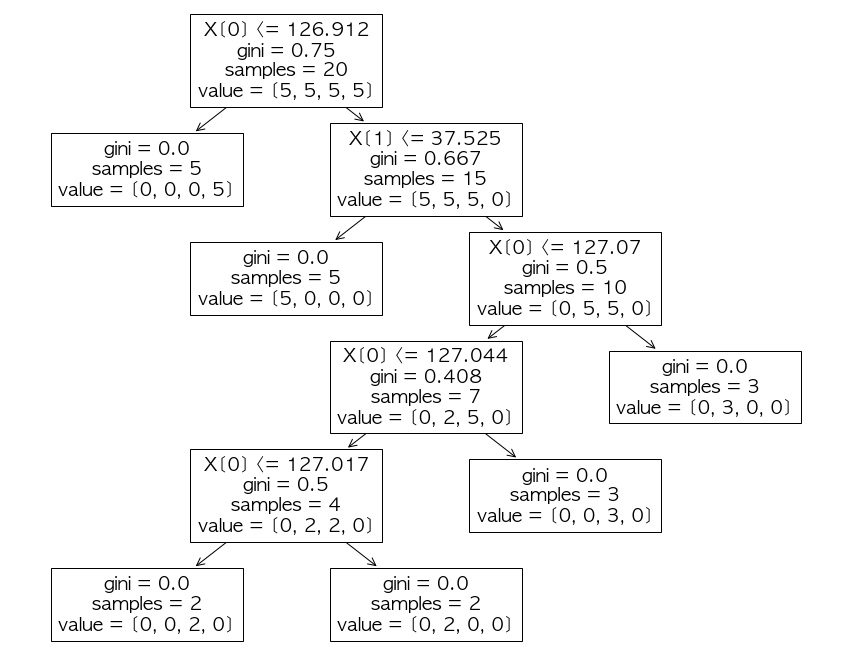

In [52]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,12))

plot_tree(dt_clf)
plt.show()

# gini : 불순도, samples = 20 는 20개 가지고 분류했다, value = (5,5,5,5)개로 분류 했다.